In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder #for label encoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load the train and test data sets in padas DataFrame
train=pd.read_csv('C:/Users/Dell/Desktop/ML_Simply_Learn_practice/DATASETS/Demo Datasets/Lesson 4/bigmart_train.csv')
test=pd.read_csv('C:/Users/Dell/Desktop/ML_Simply_Learn_practice/DATASETS/Demo Datasets/Lesson 4/bigmart_test.csv')

In [3]:
#check the number of rows and columns present in the train dataset

train.shape



(8523, 12)

In [4]:
#print the names of the columns in the train dataset
for col in train.columns:
    print(col)

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


In [5]:
#check the columns and rows present in the test dataset
test.shape

(5681, 11)

In [6]:
#print the columns of test dataset
for col in test.columns:
    print(col)

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [7]:
# combine test and train into one file to perform EDA(expalnatory data analysis)
train['source']='train' # create a new column to see which is train which is test data
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [8]:
data.head()  # item_Outlet_Sales is the target variable

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
# describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#Check missing values
data.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# we can predict these missing values using the model

In [11]:
#print the unique values in the item_fat_Content, where are only 2 unique
#values of fat content in items: low fat and regular

data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
# print the unique values in the Outlet_Establishment_Year colum, where the
# date ranges from 1985 to 2009

data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [13]:
#calculate outlet_age
data['Outlet_Age']=2018-data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [14]:
#unique values in Outlet_size
data['Outlet_Size'].unique() # there are some missing values in this column

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [15]:
#print the count value of Item_Fat_Content column
data['Item_Fat_Content'].value_counts()
#we see that low fat items are the most abundant


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [16]:
#print the count value of Outlet_size
data['Outlet_Size'].value_counts()
# the medium and small scale are the majority ot outlets

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
# us the mode function to find out the most common value in Outlet_size
data['Outlet_Size'].mode()[0]
# the outout shows that the medium is the most commonly occuring value


'Medium'

# replace the missing values in the Outlet_size value medium

In [18]:
# two variables this missing score values: Item weight and Outlet_size
# replace missing values in Outlet_size with the value medium

data['Outlet_Size']= data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [19]:
# replace teh missing values in Item_Weight with the mean weight
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

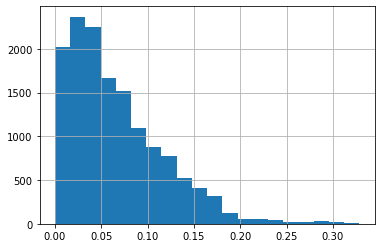

In [20]:
# plot a histogram te reveal the distribution of Item_Visibility colum

data['Item_Visibility'].hist(bins=20)

# detect the outliers
An outlier is a data point thaat lies outside the overall patter in a distribution.
A commonly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile
Using this, one can remove the outliers and outout the resulting data in fill_data variable


In [21]:
# calculate 1st quantile for ITem_visibility
Q1=data['Item_Visibility'].quantile(0.25)

In [22]:
# calculate the 2nd quantile 
Q3=data['Item_Visibility'].quantile(0.75)

In [23]:
# calcualate the interquantile range(IQR)
IQR= Q3-Q1

In [24]:
# now that the IQR range is known let's remove the outliers from the data
# the resulting data is stored on fill_data variable

fill_data=data.query('(@Q1-1.5*@IQR)<=Item_Visibility<=(@Q3 + 1.5*@IQR)')

In [25]:
# Display the data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [26]:
#check the shape of the reslting dataset without the outliers
fill_data.shape

(13943, 14)

In [27]:
data.shape # shape of the original dataset

(14204, 14)

In [28]:
# assign fill_data dataset to data DataFrame
data=fill_data
data.shape

(13943, 14)

In [29]:
#Modify Item_Visibility by converting the numerical values into the categories
# Low Visibility, Visibility, high visibility
data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels = ['low Viz','viz','high viz'])


In [30]:
#print the count of ITem_visibility_bins
data['Item_Visibility_bins'].value_counts()

low Viz     7363
viz         4283
high viz    1418
Name: Item_Visibility_bins, dtype: int64

In [31]:
data['Item_Visibility_bins'].isnull().any() # see if any null values

True

In [32]:
# replace every null value with low visibility
data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan,'Low viz',regex=True)

In [33]:
# we found typos and differences in representation in categories of Item_Fat_Content variable
#Replace all other represantation of low fat with Low Fat

data["Item_Fat_Content"]= data['Item_Fat_Content'].replace(['low fat','LF'],"Low Fat")


In [34]:
# replace all the represantation of reg with Regular
data['Item_Fat_Content']=data['Item_Fat_Content'].replace("reg","Regular")

In [35]:
#Print unique fat count values
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
#code all the categorical variables as numeric using 'LabelEncoder' from sklearn's preprocessing module
#initialize the label encoder
le= LabelEncoder()


In [37]:
# transform ITem_Fat_Content

data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])

In [38]:
# transform Item_Visibility_bins
data['Item_Visibility_bins']=le.fit_transform(data["Item_Visibility_bins"])

In [39]:
#transform Outlet_size
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])

In [40]:
#transform Outlet_Location_Type
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [41]:
#print the unique values of Outlet_Type
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [42]:
#Create dummies for Outlet_Type

dummy= pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [43]:
#explorethe column ITem_identifier
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [44]:
# as there are multiple values of Food, nonconsumable items, and drinks with wifferent numbers
# combine the item type

data['Item_Identifier'].value_counts()

FDX24    10
FDS21    10
FDY35    10
FDX08    10
NCU18    10
         ..
NCQ17     7
FDP13     7
FDG21     7
FDL50     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
 # as multiple categories are present in Item_Identifier, reduce this by mapping
    
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD': 'Food','NC': 'Non-Consumable','DR':'Drink'})

    

In [46]:
# only 3 categories are present in an ITem_Type_Combined colum

data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drink             1300
Name: Item_Type_Combined, dtype: int64

In [47]:
data.shape

(13943, 16)

In [48]:
# perform one-hot encoding for all colums as the models works on numerical values
# not on categorical values

data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
data.dtypes # only some columns are categorical whch are metions as objects

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [70]:
import warnings
warnings.filterwarnings('ignore')

#drop the columns which have been converted to different types
data.drop(["Item_Type","Outlet_Establishment_Year"], axis=1, inplace=True)

# divide the dataset created earlier into train and test datesets

train= data.loc[data['source']== 'train']
test=data.loc[data['source']== 'test']

# drop the unnecessary columns

test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#export modified versions ot the files
train.to_csv('train_modified.csv',index=False)
train.to_csv('test_modified.csv',index=False)

In [71]:
# read the train_modified.csv and test_modified.csv dataset

train2= pd.read_csv('train_modified.csv')
test2=pd.read_csv('test_modified.csv')

In [72]:
#print the data types of train2 columns
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drink               int64
Item_Type_Combined_Food                int64
Item_Type_

In [73]:
# drop the irrelevant variables from train2 dataset
# create the independent variable X_train and Dependent variable Y_train


X_train=train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'],axis=1)
y_train=train2.Item_Outlet_Sales

In [74]:
test2

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,19,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,9,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,19,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,20,3,0,1,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,31,3,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,31,1,1,0,...,1,0,0,0,1,0,0,0,1,0
8371,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,16,1,0,1,...,0,1,0,0,1,0,0,0,1,0
8372,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,14,1,1,0,...,0,0,1,0,1,0,0,0,0,1
8373,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,9,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [75]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,19,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,9,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,19,1,1,0,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,20,3,0,1,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,31,3,1,0,...,1,0,0,0,1,0,0,0,0,1


In [76]:
# import sklearn libraries for model selection

from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [83]:
# create a train and test split

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [84]:
# fit teh linear regression to the training dataset

lin=LinearRegression()


lin.fit(xtrain,ytrain)

LinearRegression()

In [85]:
# find the coefficients and intercept of the line

# Use xtrain and ytrain for linear regression


print(lin.coef_)
lin.intercept_

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]


946.4212171360825

In [86]:
# predict the test set results of training data

predictions= lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [87]:
import math

In [88]:
# find te RSME for the model

print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


In [89]:
# a good rmse for this problem is 1130. here we can imporve the RMSE by using 
# algorithms like decision trees, random forset,XGboost


# next we will predict the sales of each product at a particular store in test data


In [90]:
# predict the column Item_Outlet_Sales of test dataset

y_sales_pred= lin.predict(xtest)

In [91]:
y_sales_pred

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [93]:
test_preditions=pd.DataFrame({'Item_Identifier':test2['Item_Identifier'],'Outlet_Identifier':test2['Outlet_Identifier'],'Item_Outlet_Sales':y_sales_pred},columns=['Item_Idenfier','Outlet_Identifier','Item_Outlet_Sales'])

ValueError: array length 2513 does not match index length 8375

In [94]:
# made a hypothesis about the data without looking at it
# moved on to data exploration and found some nuances in the data which required remediatation

# performed data cleaning and features engineering and imputed the missing values and solved other irregularities
# made new features and and alsp made the data model-friendly using one-hot encoding
# bulit a regression model